<a href="https://colab.research.google.com/github/hyeongil2/Modu_DL/blob/main/%EB%8B%A4%EC%84%AF%EC%A7%B8%EB%A7%88%EB%8B%B9_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98_%ED%99%9C%EC%9A%A9(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16장 이미지 인식의 꽃, CNN 익히기
- MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학ㄱ생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터이다.

## 1 데이터 전처리
- MNIST 손글씨 인식하기

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras import Sequential
from keras.layers import Dense

import numpy as np
import sys

In [ ]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
# 이미지에 0~9까지 붙인 이름표를 Y_class 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


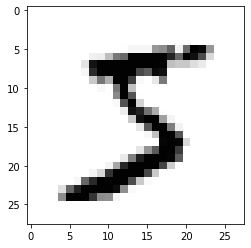

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys') # 흑백으로 출력되게 한다.
plt.show()
# 가로 28*세로 28 = 총 784개의 픽셀로 이루어져 있다.
# 각 픽셀은 밝기 정도에 따라 0~255까지의 등급을 매긴다. 
# 흰색 배경이 0이라면 글씨까 들어간 곳은 1~255숫자 중 하나로 나타남

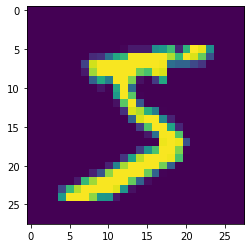

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
# print 와 sys.stdout.write의 차이점
# 일반적으로 Python에서 문자열 출력 시 print문을 사용합니다.
# 하지만 print문은 자동으로 개행이 되기 때문에 여러 줄의 문자열 출력 시 불편하기도 합니다.
# 이런 문제를 해결하기 위해 다음과 같은 방법들이 있습니다.

# 지금은 3차원에 대해서 각 픽셀별로 어떻게 입력되고 있는지 보여주기 위해서...
for i in X_train[0][0]:
  sys.stdout.write('%d\t' % i)
sys.stdout.write('\n')

print("--------------------------")

for i in X_train[0][0]:
  print('%d\t' % i)

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
--------------------------
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	


In [ ]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 주기
X_train = X_train.reshape(-1, 784) 

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# 케라스는 데이터를 0에서 1사이의 값으로 변환한 다음 구동할 떄 최적의 성능을 보인다. 
# 따라서 현재 0~255 사이의 값들을 0~1사이의 값으로 변환
X_train = X_train.astype('float64') # 기존에 정수지만 실수형으로 바꾸지 않아도 결과는 모두 실수형으로 나옴
X_train = X_train / 255

In [ ]:
X_test = X_test.reshape(-1, 784).astype('float64') / 255

In [ ]:
# 임지로 5라는 것을 확인했는데 실제로는 뭐라고 입력되어있는지 확인
print("class : %d " % (Y_class_train[0]))

class : 5 


In [ ]:
# Y 값들에 대해 원-핫 인코딩 실시
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [ ]:
print(Y_train[0]) # 5 이기때문에 6번째 인덱스가 1인 것을 확인!!

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2 딥러닝 기본 프레임 만들기

In [ ]:
# 딥러닝 프레임 성저
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath ='./model/{epoch:02d}-{val_loss: .4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, moniver = 'val_loss',verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience =10)

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs =30, batch_size = 200,
                    verbose =0, callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15567, saving model to ./model/01- 0.1557.hdf5

Epoch 00002: val_loss improved from 0.15567 to 0.10267, saving model to ./model/02- 0.1027.hdf5

Epoch 00003: val_loss improved from 0.10267 to 0.08949, saving model to ./model/03- 0.0895.hdf5

Epoch 00004: val_loss improved from 0.08949 to 0.07506, saving model to ./model/04- 0.0751.hdf5

Epoch 00005: val_loss improved from 0.07506 to 0.06751, saving model to ./model/05- 0.0675.hdf5

Epoch 00006: val_loss did not improve from 0.06751

Epoch 00007: val_loss improved from 0.06751 to 0.06660, saving model to ./model/07- 0.0666.hdf5

Epoch 00008: val_loss improved from 0.06660 to 0.06177, saving model to ./model/08- 0.0618.hdf5

Epoch 00009: val_loss improved from 0.06177 to 0.05891, saving model to ./model/09- 0.0589.hdf5

Epoch 00010: val_loss did not improve from 0.05891

Epoch 00011: val_loss did not improve from 0.05891

Epoch 00012: val_loss did not improve from 0.05891

Epoch 00013: val_lo

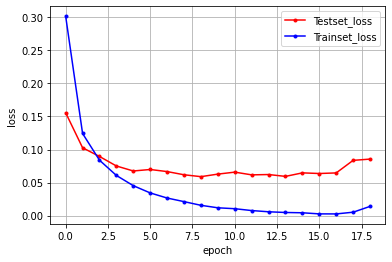

In [ ]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# 학습셋의 오차 
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c= "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= "blue", label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 23번째 실행에서 멈춘 것을 확인하고 베스트 모델은 13번째 에포크일때이며, 
# 이 모델의 테스트셋에 대한 정확도는 98.3% 이다.

## 3 더 깊은 딥러닝
- 딥러닝은 어떤 옵션을 더하고 어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있다.

## 4 컨볼루션 신경망(CNN)
- 컨볼루션 신경망은 입력된 **이미지**에 다시 한번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법이다.
- 새롭게 만들어진 층을 컨볼루션(합성곱)이라고 부른다.

$$image =
 \begin{pmatrix}
  1 & 0 & 1 \\
  2 & 1 & 0 \\
  1  & 0  & 2  \\
 \end{pmatrix}, \;\; kernel= \begin{pmatrix}
  1 & 0  \\
  0 & 1  \\
 \end{pmatrix}, \;\; convolution = \begin{pmatrix}
  2 & 0  \\
  2 & 3  \\
 \end{pmatrix}$$ 

In [ ]:
# 케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D()이다.
model.add(Conv2D(32, kernerl_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
# 첫 번째 인자: 커널을 몇 개 적용할지 정한다.
# 두 번째 인자: 커널의 크기를 정한다.
# 세 번째 인자: Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려준다. 
# (행, 열, 색상 또는 흑백) -> 만약 이미지가 색상이면 3, 흑백이면 1을 지정
# 네 번째 인자: activation 활성화 함수를 정의한다.

# 컨볼루션 층을 하나 더 추가해보기
model.add(Conv2D(64, (3, 3), activation = 'relu'))

## 5 맥스풀링
- 컨볼루션 층을 통해 이미지를 출력 했지만 결과가 여전히 크고 복잡하면 다시 축소해야한다. 
- 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라 한다.
- 맥스 풀링(max pooling)은 정해진 구역 안에서 최댓값을 뽑아낸다.
- 평균 풀링(average pooling)은  평균값을 뽑아낸다.

$$result =
 \begin{pmatrix}
  1 & 0 & 1 & 4\\
  2 & 1 & 0 & 3\\
  1  & 0  & 2 & 2  \\
  4  & 3  & 2 & 1  \\
 \end{pmatrix}, \;\; max_{pooling}= \begin{pmatrix}
  2 & 4  \\
  4 & 2  \\
 \end{pmatrix}$$ 

In [ ]:
# 맥스 풀링은 Maxpooling2D() 함수를 사용한다.
model.add(MaxPooling2D(pool_size = 2)) # 크기를 2로 정하면 전체 크기가 반으로 줄어든다.

- 드롭아웃(drop out)기법은 과적합을 효과적으로 피해가는 간단하지만 효과가 큰 기법이다.
- 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것이다.

In [ ]:
model.add(Dropout(0.25)) # 25%의 노드를 끈다.

- 이러한 과정을 지나 다시 Dens() 함수를 이용해 만들었떤 기본 층에 연결할 때 주의할 점은 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룬다는 점이다.
- 이를 1차원 배열로 바꿔주어야 활성화 함수가 있는 층으로 사용가능한데 Flatten()함수는 2차원 배열을 1차원으로 바꿔준다.

In [ ]:
model.add(Flatten()) # 2차원 배열을 1차원으로 바꿔준다.

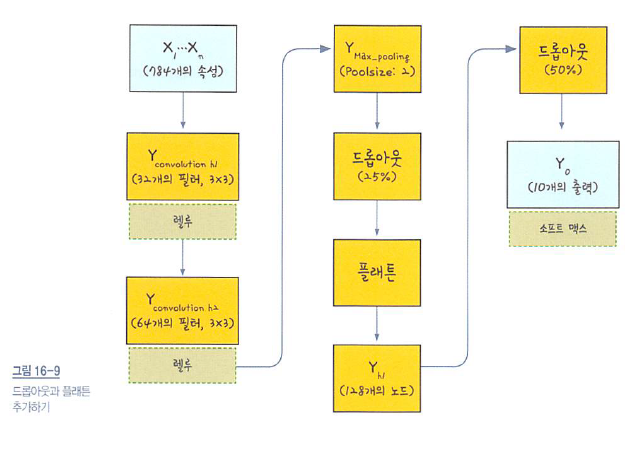


- 교재 p235 그림16-9 참고  

## 6 컨볼루션 신경망 실행하기

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# 모델 최적화
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss: 4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

313/313 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.9924

 Test Accuracy: 0.9924


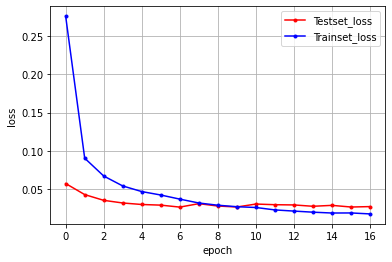

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200,
                    verbose = 0, callbacks = [early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차 
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c= 'red', label = "Testset_loss")
plt.plot(x_len, y_loss, marker = '.', c= 'blue', label = "Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 10번쨰 epoch에서 베스트 모델을 만들었고 테스트 정확도가 99.24%로 향상된 것을 확인!!
# 1000% 다 맞히지 못한 이유는 데이터 안에 이상한 글씨들이 있어서 그렇다.

# 17장 딥러닝을 이용한 자연어 처리
- 자연어란 우리가 평소에 말하는 음성이나 텍스트를 말한다.
- 즉, 자연어 처리는 이러한 음성이나 텍스트를 컴퓨터가 인식하고 처리하는 것이다.
- 자연어 처리를 컴퓨터 알고리즘은 수치로 된 데이터만 이해할 뿐 텍스트를 이해할 수 없기때문에 텍스트를 정제하는 전처리 과정이 꼭 필요하다.

## 1 텍스트의 토큰화
- 텍스트가 준비되면 단어별, 문장별, 형태소별로 나눌 수 있는데, 이렇게 작게 나누어진 하나의 단위를 토큰(token)이라 한다.
- 입력된 텍스트를 잘게 나누는 과정을 토큰화(tokenization)라 한다.

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '해보지 않으면 해낼 수 없다'
result = text_to_word_sequence(text)
print(result)

['해보지', '않으면', '해낼', '수', '없다']


In [ ]:
# Bag-of-Words라는 방법은 단어의 가방에 몇 개의 단어가 들어있는지를 세는 기법이다.
from tensorflow.keras.preprocessing.text import Tokenizer

docs = ['먼저 텍스트의 각 단어를 나누어 토는화합니다.',
        '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
        '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
        ]

In [ ]:
token = Tokenizer() # 토큰화 함수 지정
token.fit_on_texts(docs) # 토큰화 함수에 문장 적용
print(token.word_counts) # 단어의 빈도 수를 계산한 결과 출력

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토는화합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [ ]:
# 총 몇 개의 문장이 들어있는지를 셀 수 있다.
print("단어 카운트:", token.document_count)

단어 카운트: 3


In [ ]:
print(token.word_docs) # 각 단어들이 몇 개의 문장에 나오는가를 세어서 출력한다.

defaultdict(<class 'int'>, {'먼저': 1, '나누어': 1, '텍스트의': 2, '토는화합니다': 1, '각': 1, '단어를': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화해야': 1, '단어로': 1, '토큰화한': 1, '있습니다': 1, '결과는': 1, '수': 1, '사용할': 1})


In [ ]:
print(token.word_index) # 각 단어에 매겨진 인덱스 값을 출력

{'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토는화합니다': 7, '단어로': 8, '토큰화해야': 9, '인식됩니다': 10, '토큰화한': 11, '결과는': 12, '사용할': 13, '수': 14, '있습니다': 15}


## 2 단어의 원-핫 인코딩
- 각 단어를 모두 0으로 바꾸어 주고 원하는 단어만 1로 바꾸어 주는 것을 원-핫 인코딩이다.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"

token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [ ]:
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [ ]:
from keras.utils.np_utils import to_categorical

# 인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes = word_size)

print(x)
# 파이썬 배열의 인덱스는 0부터 시작하므로, 맨 앞에 0이 추가되는 것에 주의

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


## 3 단어 임베딩
- 1만 개의 단어 토큰으로 이루어진 말뭉치를 다룬다고 할 때, 데이터를 원-핫 인코딩으로 벡터화하면 9,999개의 0과 하나의 1로 이루어진 단어 벡터를 1만 개를 만들어야 한다.
- 이런 공간적 낭비를 해결하기 위해 등장한 것이 단어 임베딩(word embedding)이다.
- 단어 임베딩은 각 단어간의 유사도를 계산한다.


In [ ]:
from keras.layers import Embedding
from keras import Sequential

model = Sequential()
model.add(Embedding(16, 4)) 
# Emdedding() 함수는 최소 2개의 매개변수인 '입력'과 '출력'의 크기가 필요하다.
# 지금은 입력될 총 단어 수는 16, 임베딩 후 출력되는 벡터 크기는 4로 하겠다는 뜻이다.
# 여기에 단어를 매번 얼마나 입력할지를 추가로 지정할 수 있다.
Embedding(16, 4, input_length=2)
# 입력되는 단어 수는 16개이지만 매번 2개씩만 넣겠다는 뜻이다.

## 4 텍스트를 읽고 긍정, 부정 예측하기


In [ ]:
import numpy as np

In [ ]:
# 텍스트 리뷰 자료 지정
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = np.array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)  # 토큰화 된 결과를 출력해 확인

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [ ]:
x = token.texts_to_sequences(docs) 
# 해당 문장끼리 리스트로 묶어준다.
# 한글로 하면 한글을 단어, 형태소 등 단위로 쪼개준다.맨 위 코드 참고
print(x)

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [ ]:
# 리뷰 데이터의 토큰 수가 각각 다르다는 것에 유의
# 길이를 똑같이 맞춰 주는 작업이 필요한데 이 작업을 패딩(padding)이라고 한다.
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x = pad_sequences(x, 4)
print(padded_x)
# 최대 4인 길이에 맞춰서 모두 길이를 통일하고 기존에 길이가 4가 아닌 토큰들은 앞에 0으로 패딩된 것을 확인

[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


- 영화 리뷰가 긍정적인지 부정적인지 예측하기

In [ ]:
# 영화 리뷰가 긍정적인지 부정적인지 예측하기 - 코드 총 정리
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

# 텍스트 리뷰 자료 작성
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [ ]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞춤
padded_x = pad_sequences(x, 4)
print("패딩 결과:\n", padded_x)

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [ ]:
# 임베딩에 입력될 단어 수 지정
word_size = len(token.word_index) + 1 # 1부터 시작해서 파이썬은 0부터 인덱스를 매기므로

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과 출력
model = Sequential()
model.add(Embedding(word_size, 8, input_length = 4)) # 출력 크기는 임의로 지정, input_length = 4 -> 임베딩 길이 기준
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20) # x 값을 패딩된 값으로 사용
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 1s 534ms/step - loss: 0.6878 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6858 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6816 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6796 - accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6775 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6692 - accuracy: 0.8000
Epoch 11/20
1/1 [===================

# 18장 시퀀스 배열로 다루는 순환 신경말(RNN)
- 순환 신경망(Recurrent Neural Network, RNN)은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법이다.
- 그리고 기억된 데이터가 얼마나 중요하닞를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어간다.
- 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보인다. 
- 이렇게 같은 층 안에서 맴도는 성질 때문에 순환 신경망이라고 부른다.
- LSTM(Long Short Term Memory)은 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법이다.(LSTM은 기억 값의 가중치를 관리하는 장치를 있다고 생각) 

## 1 LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters

In [2]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split = 0.2) 
# num_words의 의미는 빈도가 높은 순으로 1~1,000에 해당하는 단어만 선택해서 불러온다는 뜻이다.

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# 데이터 확인 후 출력
import numpy as np

category = np.max(Y_train) + 1 # 0부터 세기 떄문에 1을 더해서 출력
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
# 출력 해보니 단어가 나노는 게 아니라 숫자가 나온다.
# 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙인다.
# 예를 들어 3이라고 하면 세 번쨰로 빈도가 높은 단어라는 뜻이다.

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Epoch 1/20
90/90 [==============================] - 4s 25ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 13ms/step - loss: 2.0566 - accuracy: 0.4786 - val_loss: 1.9549 - val_accuracy: 0.5093
Epoch 3/20
90/90 [==============================] - 1s 12ms/step - loss: 1.9163 - accuracy: 0.5116 - val_loss: 1.7914 - val_accuracy: 0.5481
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7482 - accuracy: 0.5498 - val_loss: 1.7387 - val_accuracy: 0.5561
Epoch 5/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7329 - accuracy: 0.5467 - val_loss: 1.7097 - val_accuracy: 0.5712
Epoch 6/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6503 - accuracy: 0.5810 - val_loss: 1.6466 - val_accuracy: 0.5957
Epoch 7/20
90/90 [==============================] - 1s 12ms/step - loss: 1.6189 - accuracy: 0.5911 - val_loss: 1.5523 - val_accuracy: 0.6171
Epoch 8/20
90

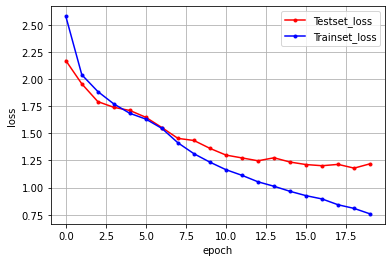

In [33]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 전처리 
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)
# 각 기사의 단어 수가 제각각 다르므로 이를 동일하게 맞춰야 한다.
# maxlen = 100 은 단어 수를 100개로 맞추라는 듰이다.
# 만일 입력된 기삭의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버린다는 의미
# 100에서 모자랄 때는 모자라는 부분을 모두 0으로 채운다.

# y 데이터에 원-핫 인코딩 처리
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100)) # (불러온 단어의 총 개수, 기사당 단어 수)
model.add(LSTM(100, activation = 'tanh'))# 100-기사당 단어 수
model.add(Dense(46, activation = 'softmax'))

# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.' ,c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
# 테스트셋에 대한 정확도가 69.37%를 보이고 있다.
# 테스트 오차가 상승하기 전까지의 학습이 과적합 직전의 최적 학습시간이다.

## 2 LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
- 사용할 인터넷 영화 데이터베이스(Internet Movie Database, IMDB)는 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 후기, 평점에 이르기까지 매우 폭넓은 데이터가 저장된 자료다.

In [30]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

# 학습셋과 데이터셋 저장하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [31]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)
# 클래스가 긍정 또는 부정 두 가지뿐이라 원-핫 인코딩 과정이 필요없다.

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
# 이미지는 데이터 배열이 2차원이지만 지금은 데이터 배열 형태가 1차원이라는 차이가 있다.(Conv2D -> Conv1D)
model.add(MaxPooling1D(pool_size = 4))
# MaxPooling1D 도 마찬가지다. 
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

Epoch 1/5
250/250 [==============================] - 6s 19ms/step - loss: 0.5558 - accuracy: 0.6805 - val_loss: 0.3680 - val_accuracy: 0.8376
Epoch 2/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2921 - accuracy: 0.8796 - val_loss: 0.3333 - val_accuracy: 0.8557
Epoch 3/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2419 - accuracy: 0.8996 - val_loss: 0.3249 - val_accuracy: 0.8598
Epoch 4/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2000 - accuracy: 0.9228 - val_loss: 0.3278 - val_accuracy: 0.8568
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3482 - accuracy: 0.8550

 Test Accuracy: 0.8550


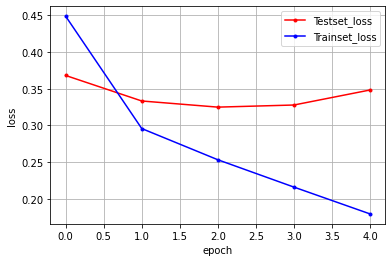

In [32]:
# 모델의 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델의 실행 
history = model.fit(x_train, y_train, batch_size=100, epochs = 5, validation_data = (x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c= 'blue', label = 'Trainset_loss')

# 그래프에 그리듣 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()